In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import sys
import pandas as pd

import pickle
import glob
import re
import yaml
import torch
import json
import random

In [56]:
# path = "/private/home/yuandong/dl_theory2/outputs/2019-08-12_15-30-36"
# path = "/private/home/yuandong/dl_theory2/outputs/2019-08-12_17-16-08"
# path = "/private/home/yuandong/dl_theory2/outputs/2019-08-12_17-21-33"
path = "/private/home/yuandong/dl_theory2/outputs/2019-08-12_17-30-26"
# decay=3
# path = "/private/home/yuandong/dl_theory2/outputs/2019-08-12_17-35-18"
# decay=3, multi=10
# path = "/private/home/yuandong/dl_theory2/outputs/2019-08-12_17-42-02"

# path = "/private/home/yuandong/dl_theory2/outputs/2019-08-12_17-51-40"

# SGD version
path = "/private/home/yuandong/dl_theory2/outputs/2019-09-01_08-45-13"
path = "/private/home/yuandong/dl_theory2/outputs/2019-09-01_08-48-26"
path = "/private/home/yuandong/dl_theory2/outputs/2019-09-01_09-04-59"
path = "/private/home/yuandong/dl_theory2/outputs/2019-09-01_09-09-21"
# path = "/private/home/yuandong/dl_theory2/outputs/2019-09-01_09-10-47"

path = "/private/home/yuandong/dl_theory2/outputs/2019-09-01_09-16-23"

path = "/private/home/yuandong/dl_theory2/outputs/2019-09-01_09-17-26"

path = "/private/home/yuandong/dl_theory2/outputs/2019-09-01_09-18-34"

path = "/private/home/yuandong/dl_theory2/outputs/2019-09-01_09-20-12"

path = "/private/home/yuandong/dl_theory2/outputs/2019-09-01_09-21-45"

args = yaml.load(open(os.path.join(path, "config.yaml"), "r"))
stats = torch.load(os.path.join(path, "stats.pickle"))

In [5]:
def x2y(w, x, y_ref):
    if abs(w[1]) < 1e-4:
        return y_ref
    else:
        return -(w[0] * x + w[2]) / w[1]

def y2x(w, y, x_ref):
    if abs(w[0]) < 1e-4:
        return x_ref
    else:
        return -(w[1] * y + w[2]) / w[0]

def get_boundary(w, xrange, yrange):
    xmin, xmax = xrange
    ymin = x2y(w, xmin, yrange[0])
    ymax = x2y(w, xmax, yrange[1])
    
    ymin = max(min(ymin, yrange[1]), yrange[0])
    ymax = max(min(ymax, yrange[1]), yrange[0])
    
    xmin = y2x(w, ymin, xmin)
    xmax = y2x(w, ymax, xmax)
    
    return xmin, xmax, ymin, ymax

In [66]:
def draw_relu(W, xrange, yrange, style, width=1, normal_len=0.1, annotation=True, prefix='', labels=None):
    n = W.size(1)    
    lens = W[:2,:].norm(dim=0)
    
    for i in range(n):
        xmin, xmax, ymin, ymax = get_boundary(W[:,i], xrange, yrange)
        
        label = labels[i] if labels is not None else None
        p = plt.plot([xmin, xmax], [ymin, ymax], linewidth=width, linestyle=style, label=label)
        
        if annotation:
            xrand = xmin + (xmax - xmin) * random.uniform(0.05, 0.4) if i % 2 == 0 else xmin + (xmax - xmin) * random.uniform(0.6, 0.95)
            yrand = x2y(W[:,i], xrand, (yrange[0] + yrange[1]) / 2)

            dx = W[0,i] / lens[i] * normal_len
            dy = W[1,i] / lens[i] * normal_len

            plt.arrow(xrand, yrand, dx, dy, head_width=0.02, head_length=0.02, fc='k', ec='k', linestyle=style)
            plt.text(xrand - 2*dx, yrand - 2*dy, f"{prefix}{i}", color=p[0].get_color(), \
                     fontsize=14, bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1}, \
                     ha='center', va='center')             

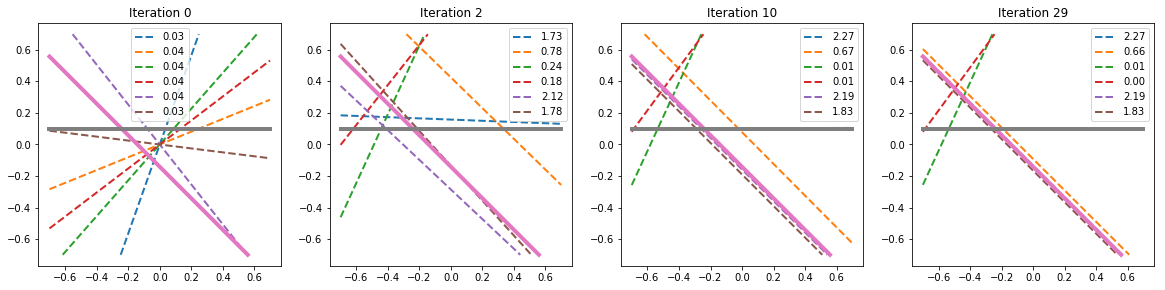

In [75]:
xrange = [-0.7, 0.7]
yrange = [-0.7, 0.7]

s = stats[list(stats.keys())[0]]

plt.figure(figsize=(20, 7))

annotation = False

for i, it in enumerate((0, 2, 10, 29)):
    plt.subplot(1, 4, i + 1)
    
    labels = [ f"{item.item():#.2f}" for item in s[it]["W2_s"].norm(dim=1)[:-1]]
    
    draw_relu(s[it]["W1_s"], xrange, yrange, '--', width=2, normal_len=0.01, labels=labels, annotation=annotation, prefix="s")
    draw_relu(s[0]["W1_t"], xrange, yrange, '-', width=4, normal_len=0.01, annotation=annotation, prefix="t")

    plt.axis([*xrange, *xrange])
    plt.axis('square')
    plt.legend()
    plt.title(f'Iteration {it}')
plt.savefig("visualization.pdf")

In [64]:
s[-1]["W2_s"].size()

torch.Size([7, 50])

(-1.1, 1.1, -0.55, 1.6500000000000001)

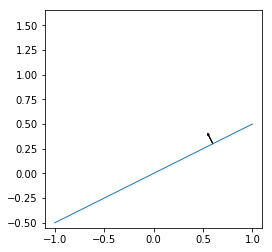

In [117]:
draw_relu(torch.FloatTensor([-2, 4, 0]).view(-1, 1), [-1, 1], [-1, 1], '-')
plt.axis('square')

In [42]:
torch.FloatTensor([[-2, 3, 0]]).size()

torch.Size([1, 3])

In [169]:
s[-1]["corr_train"].max(dim=1)

(tensor([1.0000, 0.9860], dtype=torch.float64), tensor([ 9, 16]))

In [170]:
s[-1]["corr_train"]

tensor([[-0.1600, -0.2935,  1.0000,  0.5505, -0.3084, -0.4652,  1.0000,  0.7720,
          1.0000,  1.0000, -0.4618,  1.0000, -0.3239, -0.1705, -0.1756,  0.2017,
         -0.4039,  0.4456, -0.3110, -0.4646],
        [-0.3087, -0.1796, -0.3714, -0.4667, -0.1581,  0.6293, -0.3720, -0.4556,
         -0.3715, -0.3719,  0.6140, -0.3716,  0.9773, -0.3013, -0.2976,  0.4227,
          0.9860,  0.1833, -0.1540,  0.6311]], dtype=torch.float64)